<a href="https://colab.research.google.com/github/Manjunath727/DLwithTF/blob/master/CNN_Using_TF/W4/RockPaperScissor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class classification

In this example we check multi-class classification algorithm for rock-paper-scissors game.

## Step 1 - Download the data
      1. Get the rock, paper and scissors both training and test dataset
      2. Create their respective directory structures for both training and test-set of rps
      3. Visualise some of the input files

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip


--2019-07-17 21:36:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   104MB/s    in 1.8s    

2019-07-17 21:36:03 (104 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-07-17 21:36:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/r

In [0]:
import os
import zipfile

with zipfile.ZipFile('/tmp/rps.zip') as z_ref:
  z_ref.extractall('/tmp/')
  z_ref.close()
  
with zipfile.ZipFile('/tmp/rps-test-set.zip') as z_ref:
  z_ref.extractall('/tmp')
  z_ref.close()

In [3]:
# Create train and test dirs for rock, paper and scissors

rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print(len(rock_files))
print(len(paper_files))
print(len(scissors_files))

840
840
840


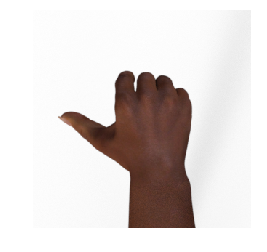

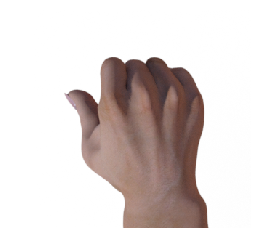

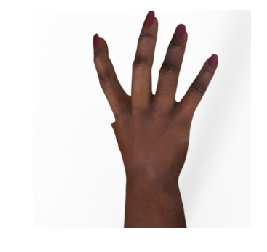

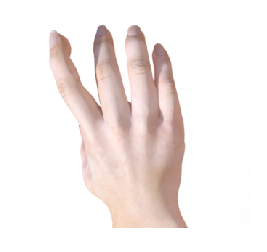

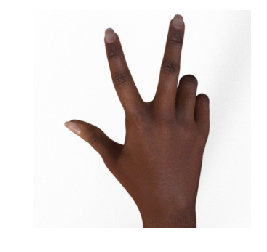

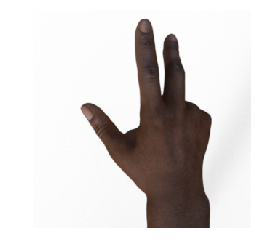

In [4]:
# Visualizing images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
              for fname in rock_files[pic_index-2:pic_index]]

next_paper = [os.path.join(paper_dir, fname)
              for fname in paper_files[pic_index-2:pic_index]]

next_scissor = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock + next_paper + next_scissor):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Step 2 - Data Preprocessing , Build  and traing the model 
      1. Data preprocessing - Here we build datagenerator which are used for Data augmentation  purposes.
      2. 

In [5]:
# Data Generators
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = '/tmp/rps'
training_datagen = ImageDataGenerator( rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

VALIDATION_DIR = '/tmp/rps-test-set/'
validation_datagen = ImageDataGenerator( rescale=1./255)

# train_generator use flow_from_directory
train_generator = training_datagen.flow_from_directory(
                    TRAINING_DIR,
                    target_size=(150,150),
                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
                        VALIDATION_DIR,
                        target_size=(150,150),
                        class_mode='categorical')


model = tf.keras.models.Sequential([
        # Input shape is desired to be of 150,150,3
        tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        # 2nd convolution
        tf.keras.layers.Conv2D(64,(3,3), activation='relu',),
        tf.keras.layers.MaxPooling2D(2,2),
        # 3rd Convolution
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # 4th Convolution
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        # DNN
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data=validation_generator, verbose=1)

model.save('rps.h5')

W0717 21:36:12.883577 140420650919808 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

## Plot the accuracy

      1. In this section we plot the accuracy curve for both validation and training data
      2. Also verify the output for additional validation images which we upload.

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()

plt.show()

In [7]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # Prediction on uploaded images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x= np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(fn)
  print(classes)


Saving paper1.png to paper1.png
Saving paper2.png to paper2.png
Saving paper3.png to paper3.png
Saving paper4.png to paper4.png
Saving paper5.png to paper5.png
Saving paper6.png to paper6.png
Saving paper7.png to paper7.png
Saving paper8.png to paper8.png
Saving paper9.png to paper9.png
Saving paper-hires1.png to paper-hires1.png
Saving paper-hires2.png to paper-hires2.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock3.png to rock3.png
Saving rock4.png to rock4.png
Saving rock5.png to rock5.png
Saving rock6.png to rock6.png
Saving rock7.png to rock7.png
Saving rock8.png to rock8.png
Saving rock9.png to rock9.png
Saving rock-hires1.png to rock-hires1.png
Saving rock-hires2.png to rock-hires2.png
Saving scissors1.png to scissors1.png
Saving scissors2.png to scissors2.png
Saving scissors3.png to scissors3.png
Saving scissors4.png to scissors4.png
Saving scissors5.png to scissors5.png
Saving scissors6.png to scissors6.png
Saving scissors7.png to scissors7.png
Savi